# Financial Data Analysis

In [208]:
#imports and display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns

sns.set_theme()
plt.style.use('bmh')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## 1. Load Data & Get a basic undestanding of it

In [209]:
df = pd.read_csv('financial_risk_assessment.csv')

In [210]:
df

Age      Gender Education Level Marital Status    Income  Credit Score  \
0       49        Male             PhD       Divorced   72799.0         688.0   
1       57      Female      Bachelor's        Widowed       NaN         690.0   
2       21  Non-binary        Master's         Single   55687.0         600.0   
3       59        Male      Bachelor's         Single   26508.0         622.0   
4       25  Non-binary      Bachelor's        Widowed   49427.0         766.0   
...    ...         ...             ...            ...       ...           ...   
14995   23  Non-binary      Bachelor's        Widowed   48088.0         609.0   
14996   56        Male             PhD         Single  107193.0         700.0   
14997   29  Non-binary             PhD        Married   46250.0         642.0   
14998   53  Non-binary             PhD       Divorced   40180.0         638.0   
14999   24  Non-binary      Bachelor's        Widowed       NaN         765.0   

       Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0          45713.0     Business        Unemployed                    19   
1          33835.0         Auto          Employed                     6   
2          36623.0         Home          Employed                     8   
3          26541.0     Personal        Unemployed                     2   
4          36528.0     Personal        Unemployed                    10   
...            ...          ...               ...                   ...   
14995      26187.0         Home     Self-employed                     2   
14996      35111.0         Auto     Self-employed                    10   
14997      44369.0         Home        Unemployed                    19   
14998      32752.0         Home     Self-employed                    12   
14999          NaN     Personal     Self-employed                    18   

      Payment History  Debt-to-Income Ratio  Assets Value  \
0                Poor              0.154313      120228.0   
1                Fair              0.148920       55849.0   
2                Fair              0.362398      180700.0   
3           Excellent              0.454964      157319.0   
4                Fair              0.143242      287140.0   
...               ...                   ...           ...   
14995            Fair              0.317633           NaN   
14996            Fair              0.155126       79102.0   
14997       Excellent              0.593999      196930.0   
14998       Excellent              0.478035      276060.0   
14999       Excellent              0.116083       71699.0   

       Number of Dependents                 City State  \
0                       0.0       Port Elizabeth    AS   
1                       0.0      North Catherine    OH   
2                       3.0          South Scott    OK   
3                       3.0           Robinhaven    PR   
4                       NaN          New Heather    IL   
...                     ...                  ...   ...   
14995                   4.0            Susanstad    TN   
14996                   NaN         Port Heather    WA   
14997                   4.0  South Morganchester    LA   
14998                   NaN           Port Wayne    AK   
14999                   3.0          South Stacy    WA   

                         Country  Previous Defaults  Marital Status Change  \
0                         Cyprus                2.0                      2   
1                   Turkmenistan                3.0                      2   
2                     Luxembourg                3.0                      2   
3                         Uganda                4.0                      2   
4                        Namibia                3.0                      1   
...                          ...                ...                    ...   
14995                   Djibouti                2.0                      0   
14996                      Congo                0.0                      0   
1

The dataset consists of 15,000 records of loan requests with many interesting factors to analyze. 

In [211]:
df.describe()

Age         Income  Credit Score   Loan Amount  \
count  15000.000000   12750.000000  12750.000000  12750.000000   
mean      43.452667   69933.398510    699.109098  27450.010902   
std       14.910732   29163.626207     57.229465  12949.940135   
min       18.000000   20005.000000    600.000000   5000.000000   
25%       31.000000   44281.500000    650.000000  16352.500000   
50%       43.000000   69773.000000    699.000000  27544.000000   
75%       56.000000   95922.750000    748.000000  38547.500000   
max       69.000000  119997.000000    799.000000  49998.000000   

       Years at Current Job  Debt-to-Income Ratio   Assets Value  \
count          15000.000000          15000.000000   12750.000000   
mean               9.476267              0.350438  159741.497176   
std                5.769707              0.143919   80298.115832   
min                0.000000              0.100004   20055.000000   
25%                4.000000              0.227386   90635.250000   
50%                9.000000              0.350754  159362.000000   
75%               15.000000              0.476095  228707.000000   
max               19.000000              0.599970  299999.000000   

       Number of Dependents  Previous Defaults  Marital Status Change  
count           12750.00000       12750.000000           15000.000000  
mean                2.02651           1.992471               0.998467  
std                 1.41130           1.416909               0.813782  
min                 0.00000           0.000000               0.000000  
25%                 1.00000           1.000000               0.000000  
50%                 2.00000           2.000000               1.000000  
75%                 3.00000           3.000000               2.000000  
max                 4.00000           4.000000               2.000000

<Axes: >

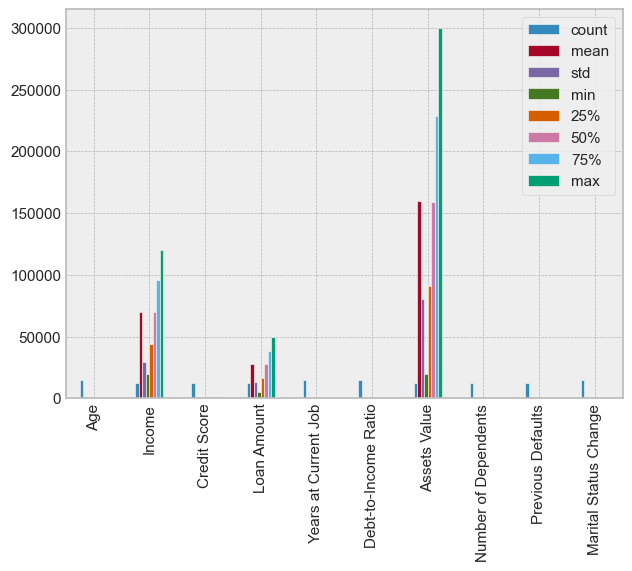

In [212]:
df.describe().T.plot(kind='bar')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

We can see the columns where null values appear.

In [214]:
#Remove spaces from column names
df.columns = [c.replace(' ','_') for c in df.columns]

## 2. Factor Distribution analysis

In [215]:
df_1 = df[['Age']]



In [216]:
df_1.isna().value_counts()

Age  
False    15000
Name: count, dtype: int64

No missing values for Age column

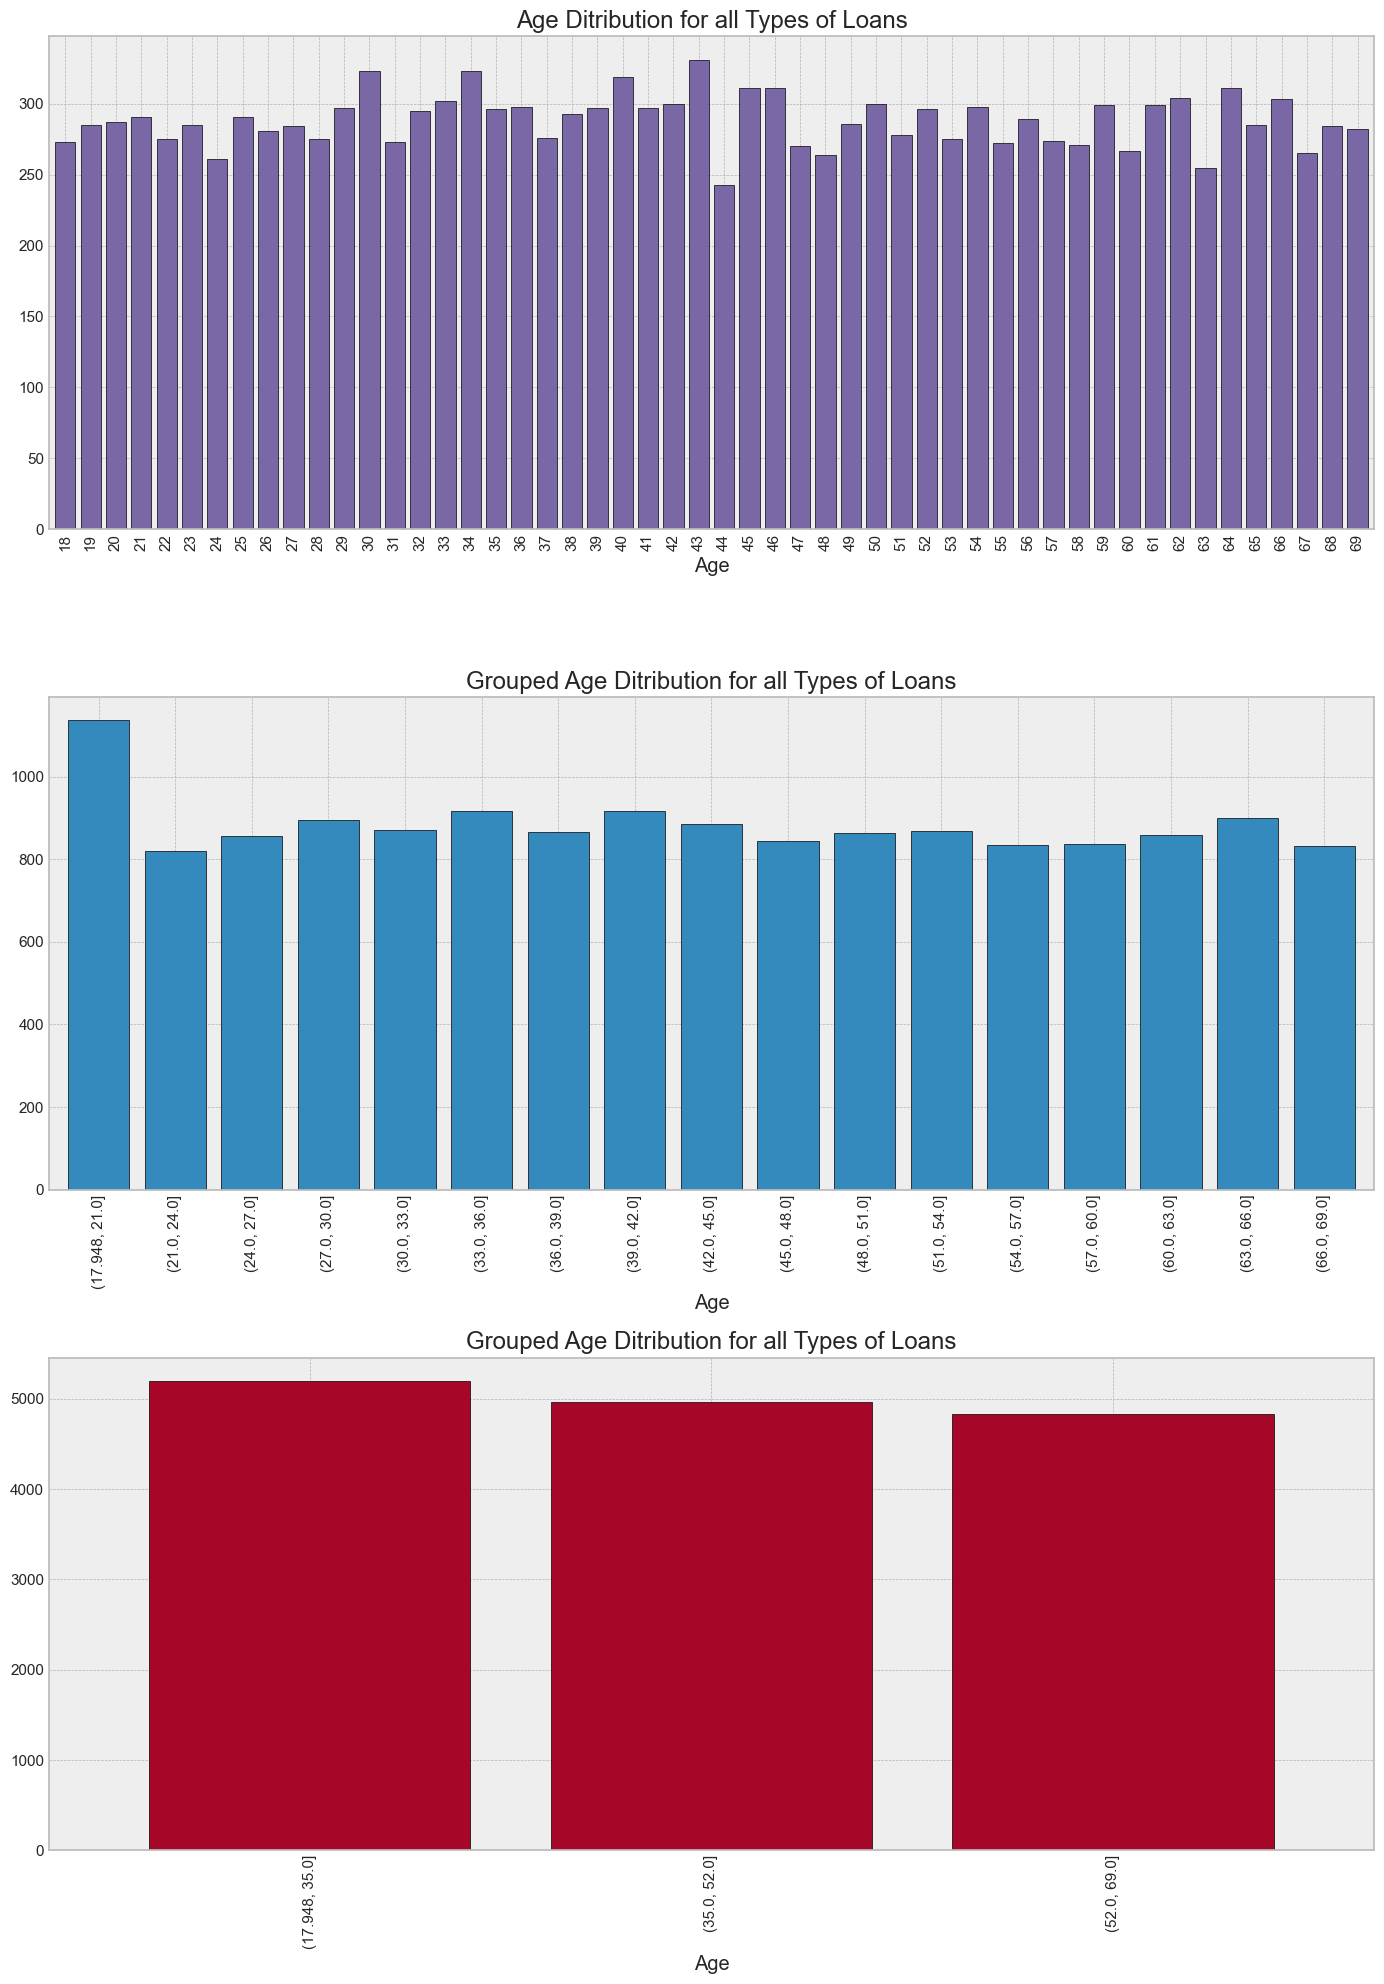

In [217]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,20))
df_1['Age'].value_counts().sort_index().plot(ax=ax1, kind='bar',width=0.8,edgecolor='black',color=color_pal[2])
ax1.set_title('Age Ditribution for all Types of Loans')
df_1['Age'].value_counts(bins=17).sort_index().plot(ax=ax2, kind='bar',xlabel='Age', width=0.8,edgecolor='black',color=color_pal[0])
ax2.set_title('Grouped Age Ditribution for all Types of Loans')
df_1['Age'].value_counts(bins=3).sort_index().plot(ax=ax3, kind='bar', xlabel='Age', width=0.8,edgecolor='black',color=color_pal[1])
ax3.set_title('Grouped Age Ditribution for all Types of Loans')
plt.tight_layout()
plt.show()


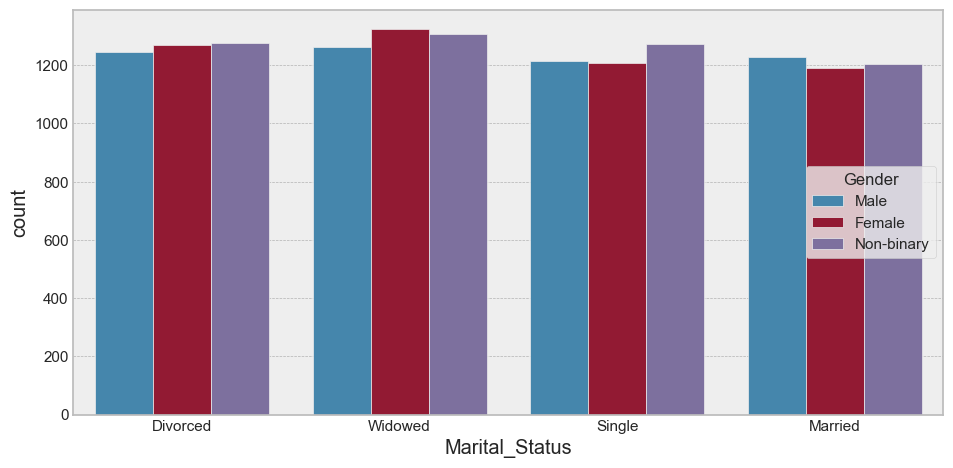

In [218]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='Marital_Status', data=df,hue='Gender')
sns.move_legend(ax, "center right")
plt.show()

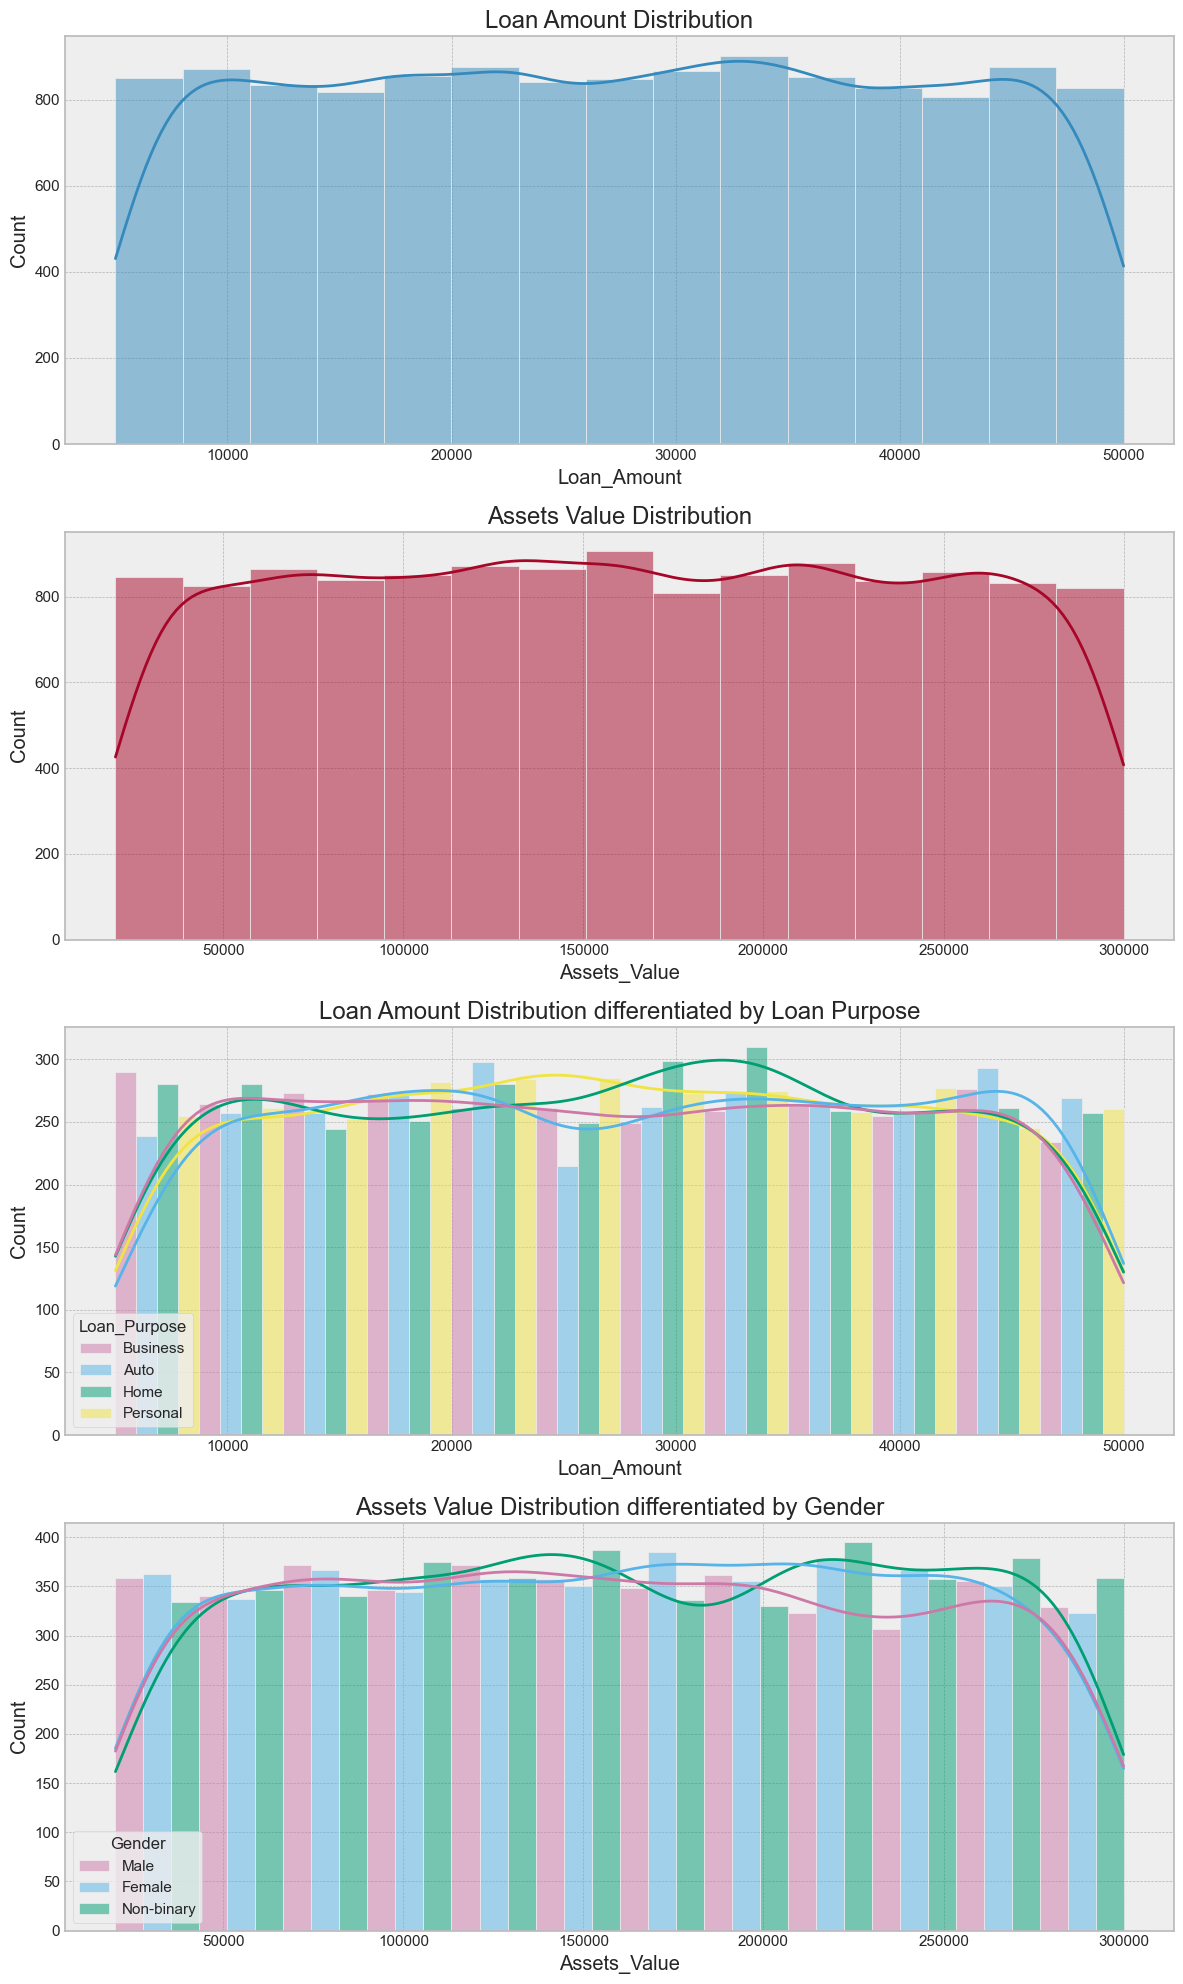

In [219]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12,20))
sns.histplot(data=df,ax=ax1,x='Loan_Amount',multiple="dodge",bins=15,color=color_pal[0],kde=True)
sns.histplot(data=df,ax=ax2,x='Assets_Value',multiple="dodge",bins=15,color=color_pal[1],kde=True)
sns.histplot(data=df,ax=ax3, hue='Loan_Purpose',x='Loan_Amount',multiple="dodge",bins=12,palette=color_pal[5:9],kde=True)
sns.histplot(data=df,ax=ax4, hue='Gender',x='Assets_Value',multiple="dodge",bins=12,palette=color_pal[5:8],kde=True)
ax1.set_title('Loan Amount Distribution')
ax2.set_title('Assets Value Distribution')
ax3.set_title('Loan Amount Distribution differentiated by Loan Purpose')
ax4.set_title('Assets Value Distribution differentiated by Gender')
plt.tight_layout()
plt.show()

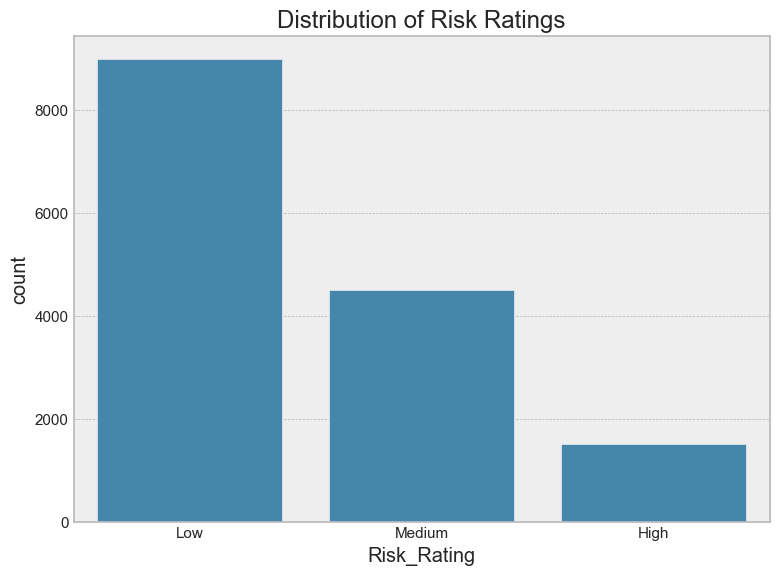

In [220]:
plt.figure(figsize=(8,6))
sns.countplot(x='Risk_Rating', data=df)
plt.title('Distribution of Risk Ratings')
plt.show()

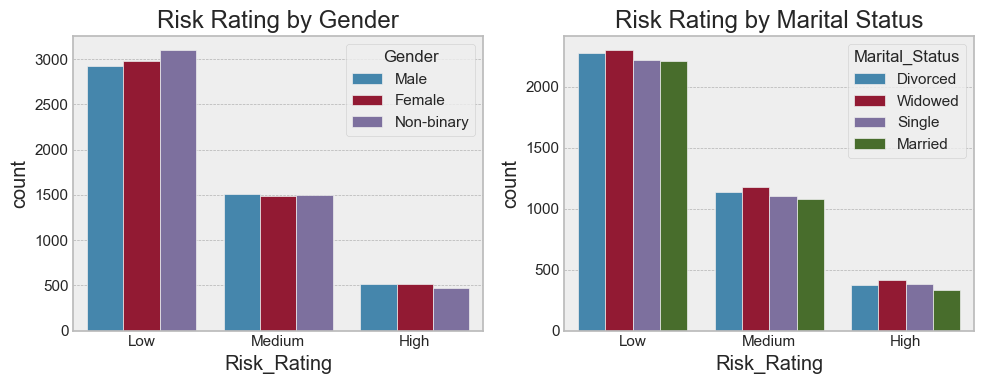

In [221]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Risk_Rating', hue='Gender', data=df)
plt.title('Risk Rating by Gender')

plt.subplot(1, 2, 2)
sns.countplot(x='Risk_Rating', hue='Marital_Status', data=df)
plt.title('Risk Rating by Marital Status')

plt.tight_layout()
plt.show()

## 3. Looking for Dependencies

In [222]:
df['Education_Level'].value_counts()

Education_Level
Bachelor's     3829
High School    3774
PhD            3760
Master's       3637
Name: count, dtype: int64

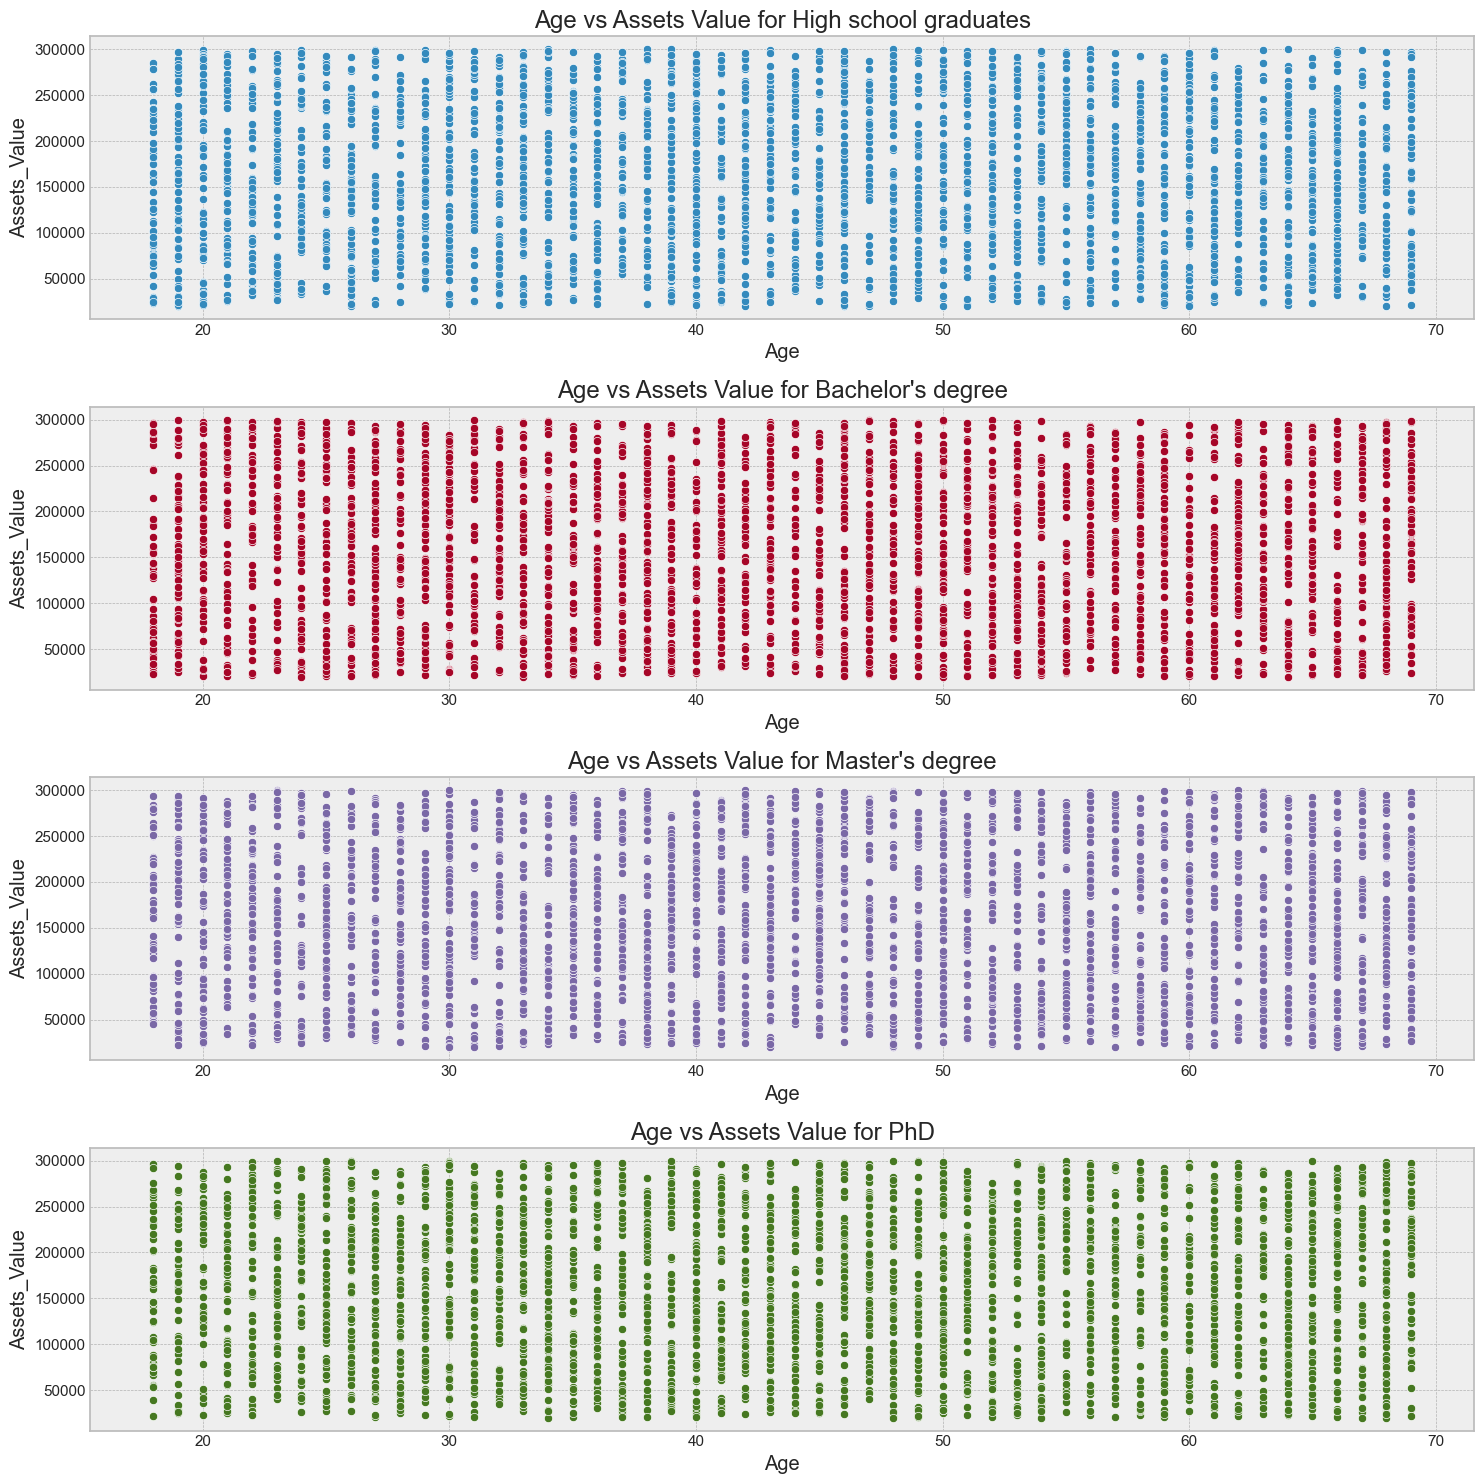

In [223]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,15))
sns.scatterplot(data=df.query('Education_Level=="High School"'),ax=ax1,x='Age',y='Assets_Value',color=color_pal[0])
sns.scatterplot(data=df.query('Education_Level=="Bachelor\'s"'),ax=ax2,x='Age',y='Assets_Value',color=color_pal[1])
sns.scatterplot(data=df.query('Education_Level=="Master\'s"'),ax=ax3,x='Age',y='Assets_Value',color=color_pal[2])
sns.scatterplot(data=df.query('Education_Level=="PhD"'),ax=ax4,x='Age',y='Assets_Value',color=color_pal[3])
ax1.set_title('Age vs Assets Value for High school graduates')
ax2.set_title('Age vs Assets Value for Bachelor\'s degree')
ax3.set_title('Age vs Assets Value for Master\'s degree')
ax4.set_title('Age vs Assets Value for PhD')
plt.tight_layout()
plt.show()


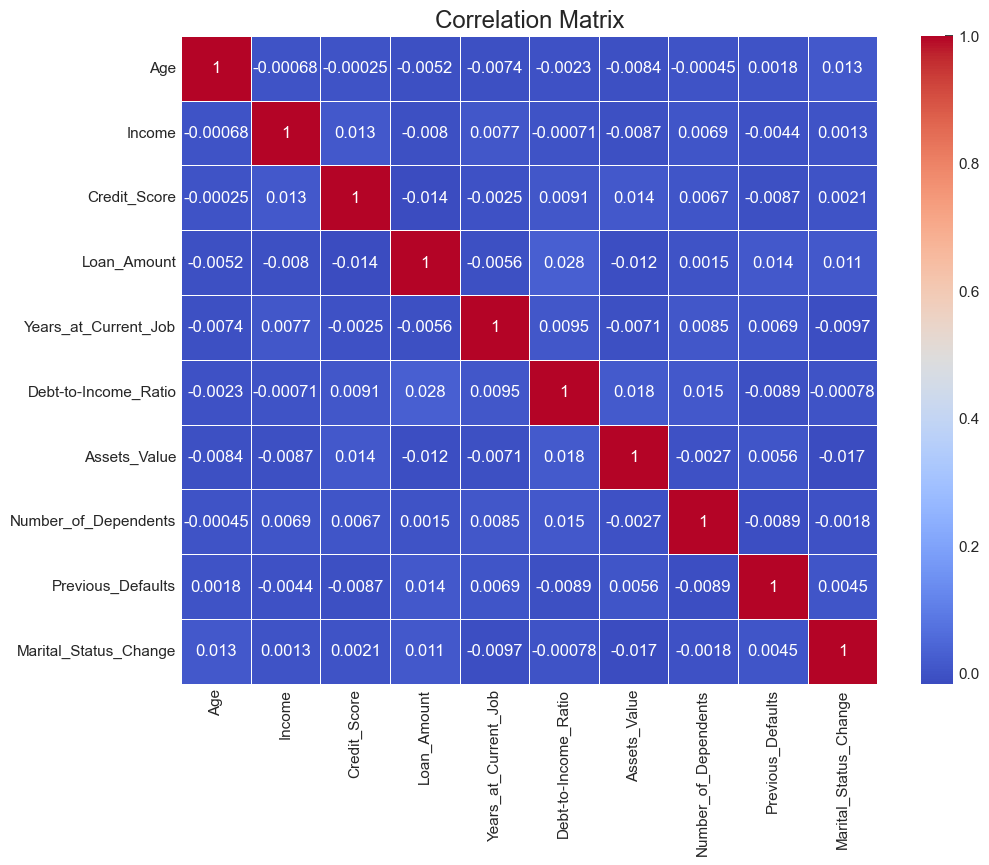

In [224]:
#Heat map of correltion matrix
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

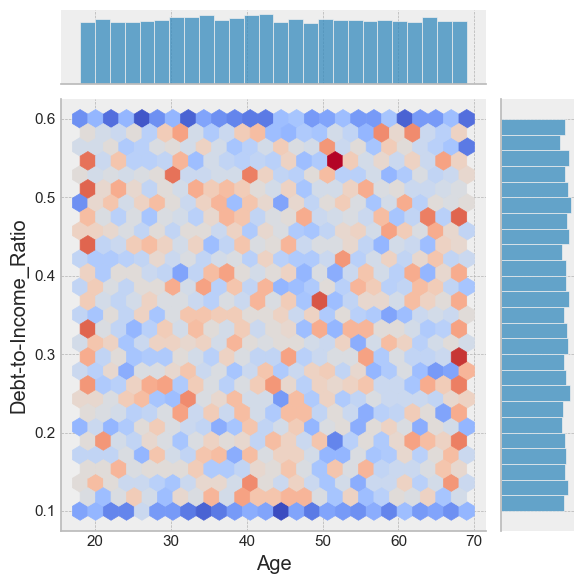

In [225]:
# Jointplot for Age and Debt-to-Income Ratio
sns.jointplot(x='Age', y='Debt-to-Income_Ratio', data=df, kind='hex', cmap='coolwarm')
plt.show()

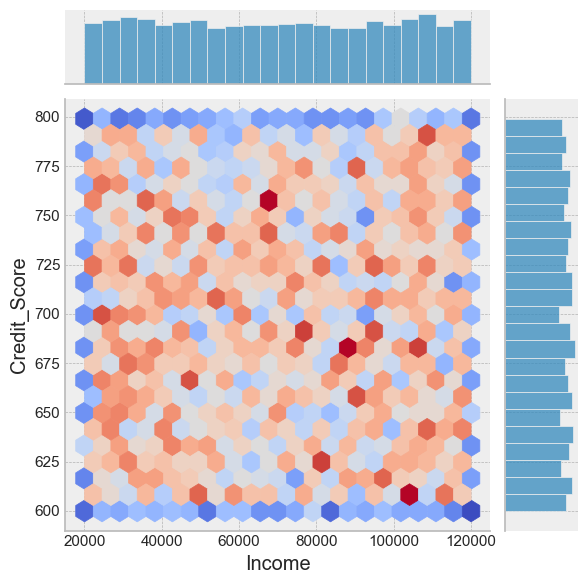

In [226]:
# Jointplot for Income and Credit Score
sns.jointplot(x='Income', y='Credit_Score', data=df, kind='hex', cmap='coolwarm')
plt.show()

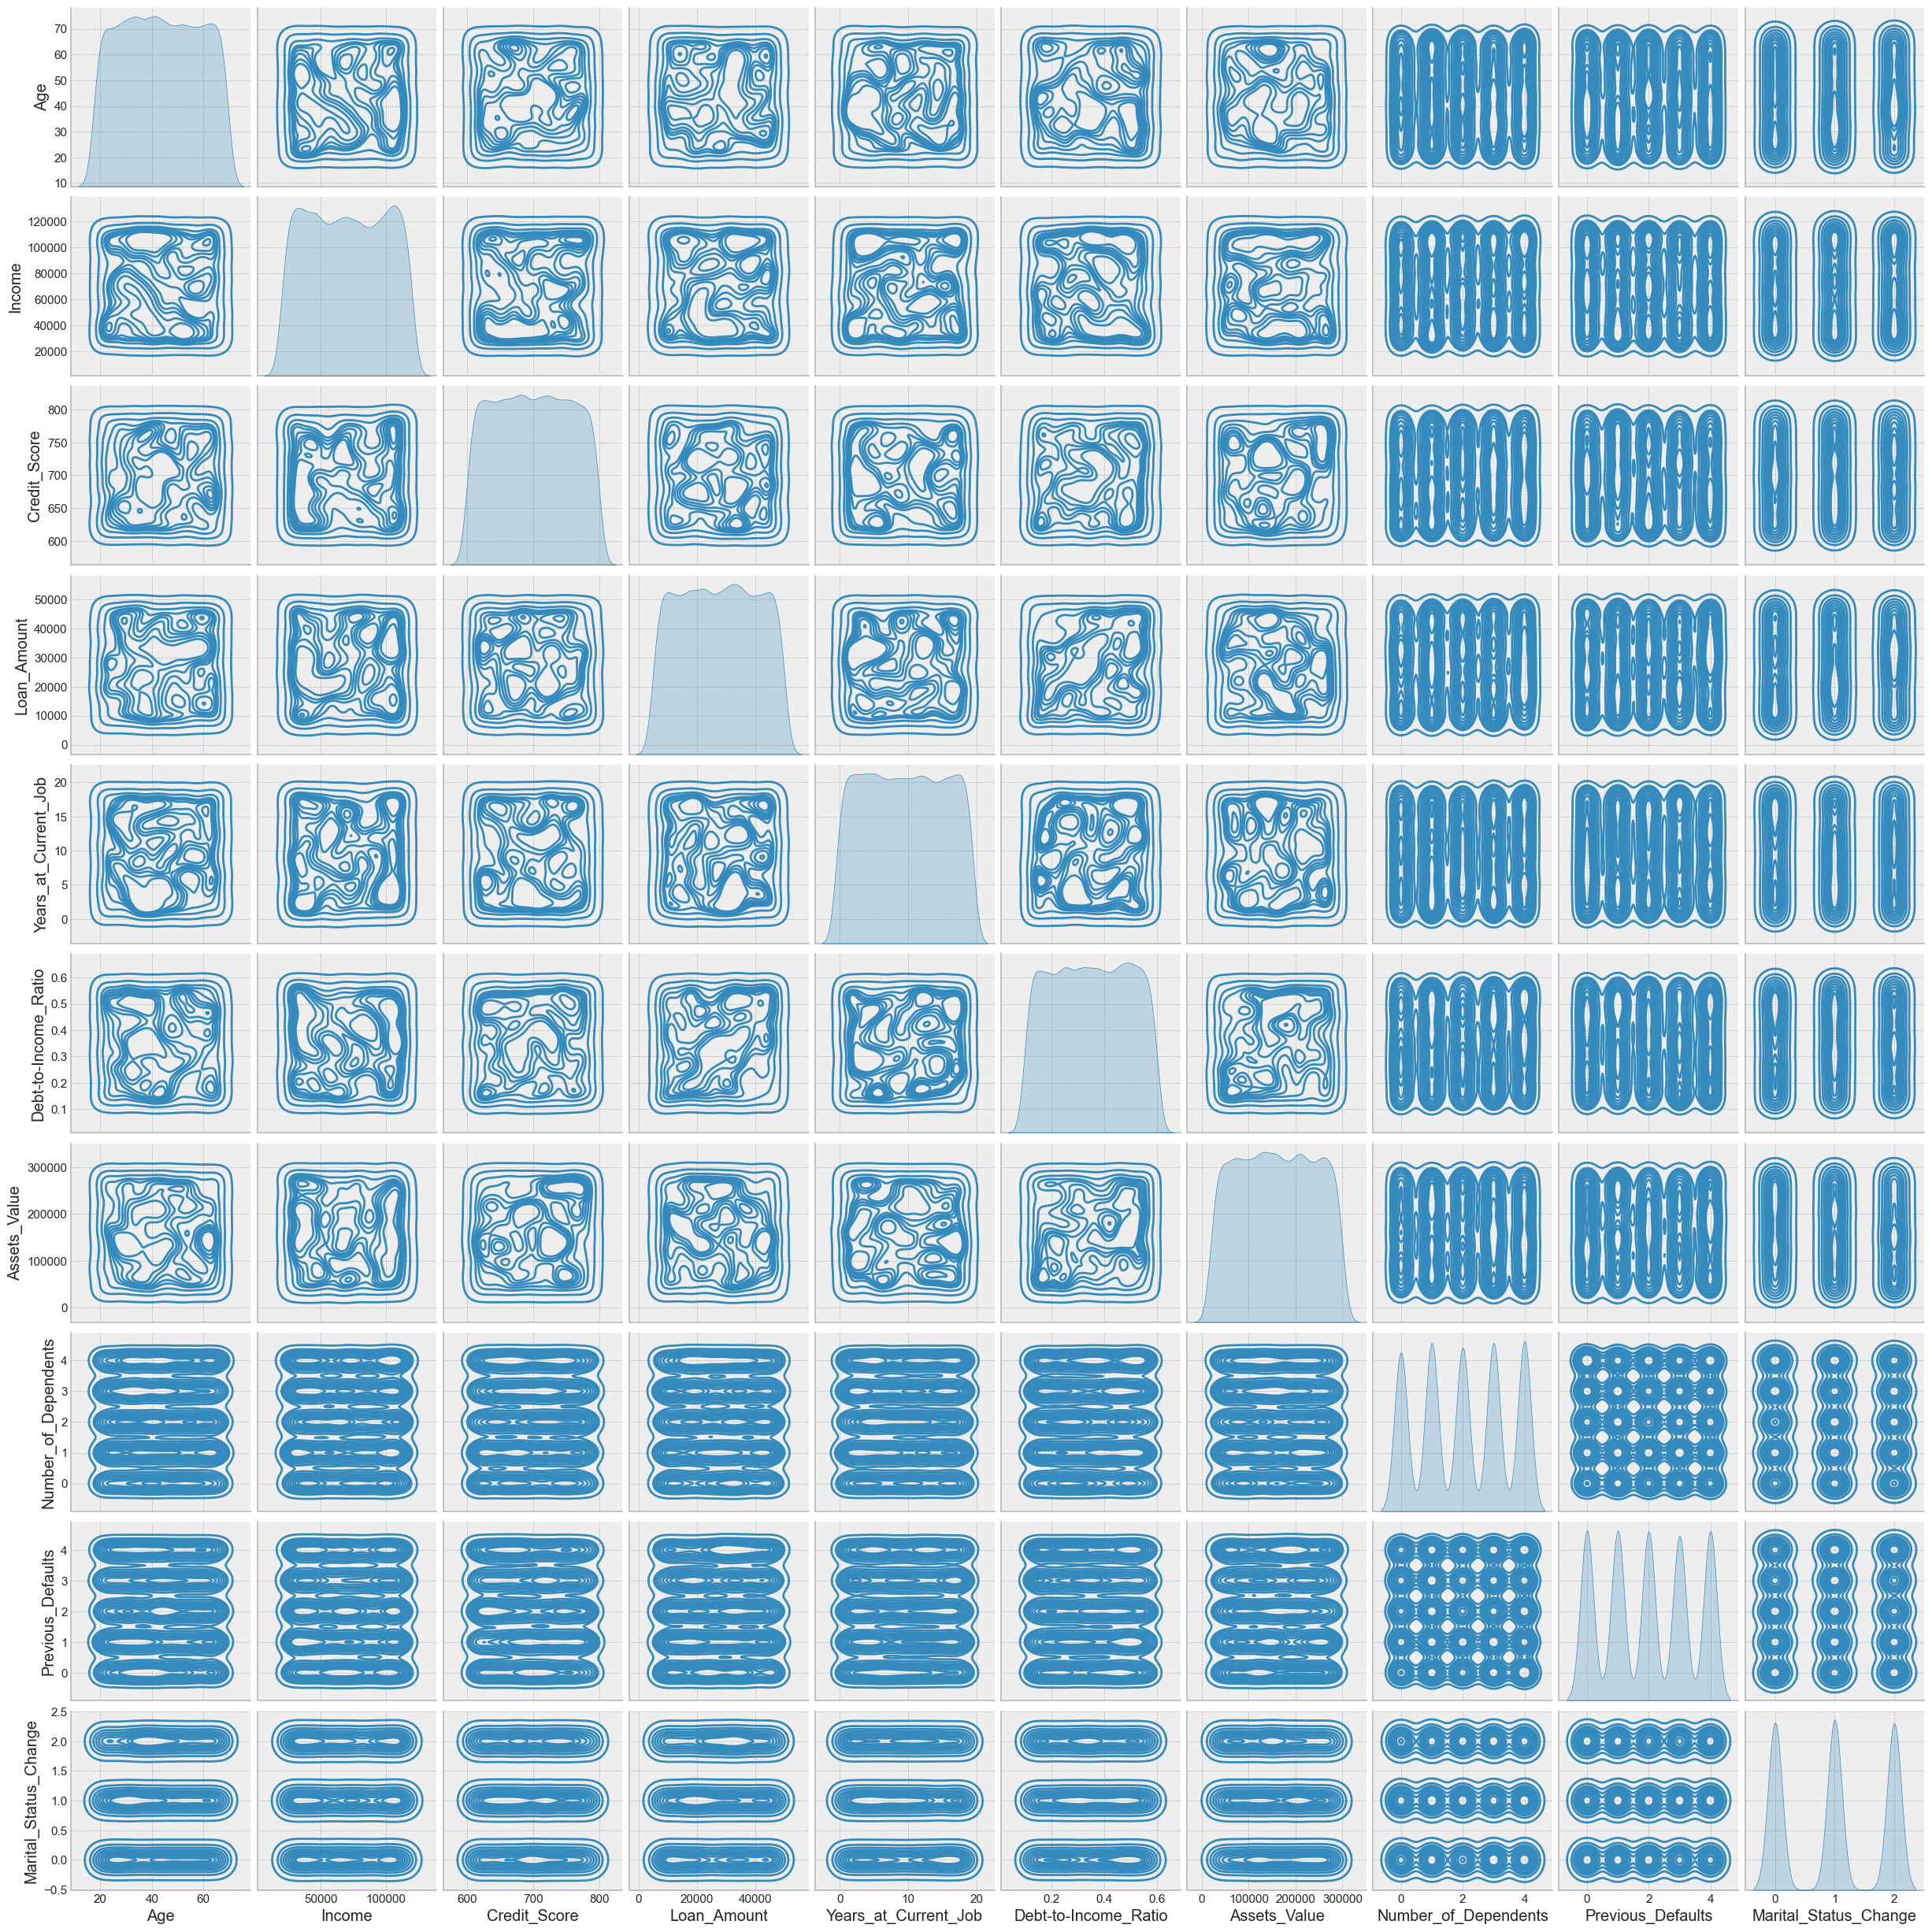

In [227]:
sns.pairplot(numeric_df,kind='kde')